In [11]:
print("hello colab")

hello colab


In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#4/AAAXVnda_OR8LAsdfoWhwn8h_KHGCx254BRCBFZhYdWjA-UO5_3iLqc

gpg: keybox '/tmp/tmpscgdydu7/pubring.gpg' created
gpg: /tmp/tmpscgdydu7/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
import os
os.chdir("./drive/facial_expression")
import sys
os.path.dirname(sys.executable)


'/usr/bin'

In [6]:
import pandas as pd
import numpy as np
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
data  = pd.read_csv("data/fer2013.csv")
print(len(data))

35887


In [0]:
data_train = data[data["Usage"]=="Training"]
#print(len(data_train))
data_test = data[data["Usage"]=="PublicTest"]
#print(data_test)

In [0]:
facial_index = {0:"Angry",1 :"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
def split_data(data):
    emotion = np.array(data["emotion"])
    pixels = np.array(data["pixels"])
    x = []
    for pixel in pixels:
        list_pixel = list(pixel.split(" "))
        x.append(list_pixel)
    return  np.array(x,dtype=np.float32),emotion

In [10]:
X_train,y_train = split_data(data_train)
#print(X_train)
#print(y_train)
X_test,y_test = split_data(data_test)
print("Done")

Done


In [0]:
X_train = X_train/255
X_test = X_test/255
X_train = X_train.reshape((-1,48,48,1))
X_test = X_test.reshape((-1,48,48,1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
# model = Sequential()
# #layer 1
# model.add(Conv2D(64,strides =(1,1),kernel_size=(7,7),padding="same",activation="relu",input_shape=(48,48,1)))
# model.add(Conv2D(64,strides =(1,1),kernel_size=(7,7),padding="same",activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(rate=0.25))
# model.add(MaxPool2D(pool_size=(3,3),padding="same",strides=(2,2)))
# #layer 2
# model.add(Conv2D(128,kernel_size=(5,5),padding="same",activation="relu"))
# model.add(Conv2D(128,kernel_size=(5,5),padding="same",activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(rate=0.25))
# model.add(MaxPool2D(pool_size=(3,3),strides=(2,2),padding="same"))
# #layer 3
# model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
# model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(3,3),strides=(2,2),padding="same"))
# #layer 4
# model.add(Flatten())
# model.add(Dense(256,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
# #layer 5
# model.add(Dense(512,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# # fully connection
# model.add(Dense(7,activation="softmax"))

# # Compiler
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
# model.summary()
img_rows, img_cols = 48, 48
model = Sequential()
model.add(Conv2D(64, 5, 5, border_mode='valid',input_shape=(48,48,1)))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(2, 2), dim_ordering='th'))
model.add(MaxPool2D(pool_size=(5, 5),strides=(2, 2)))

model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th')) 
model.add(Conv2D(64, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th')) 
model.add(Conv2D(64, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))

model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
model.add(Conv2D(128, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
model.add(Conv2D(128, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))

model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(Dropout(0.2))


model.add(Dense(7,activation="softmax"))

# ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
# model.compile(loss='categorical_crossentropy',
#               optimizer=ada,
#               metrics=['accuracy'])
# model.summary()
# Compiler
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(48, 48, 1..., padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(2, 2), data_format="channels_first")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(1, 1), data_format="channels_first")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 44, 44, 64)        123904    
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 44, 48, 68)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 22, 68)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 20, 24, 70)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 22, 64)        40384     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 18, 22, 64)        25344     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`


In [0]:
datagen = ImageDataGenerator()
data_generator = datagen.flow(X_train, y_train, batch_size=128)

In [14]:
history = model.fit_generator(data_generator,epochs=150,steps_per_epoch=128,validation_data = (X_test,y_test),verbose=2)

Epoch 1/150
 - 14s - loss: 1.8337 - acc: 0.2382 - val_loss: 1.8150 - val_acc: 0.2494
Epoch 2/150
 - 11s - loss: 1.7868 - acc: 0.2608 - val_loss: 1.7065 - val_acc: 0.3020
Epoch 3/150
 - 11s - loss: 1.7099 - acc: 0.3116 - val_loss: 1.6918 - val_acc: 0.3391
Epoch 4/150
 - 11s - loss: 1.6407 - acc: 0.3476 - val_loss: 1.6134 - val_acc: 0.3636
Epoch 5/150
 - 11s - loss: 1.5627 - acc: 0.3865 - val_loss: 1.5695 - val_acc: 0.3867
Epoch 6/150
 - 11s - loss: 1.5106 - acc: 0.4152 - val_loss: 1.5005 - val_acc: 0.4216
Epoch 7/150
 - 11s - loss: 1.4438 - acc: 0.4449 - val_loss: 1.4120 - val_acc: 0.4505
Epoch 8/150
 - 11s - loss: 1.3909 - acc: 0.4666 - val_loss: 1.3832 - val_acc: 0.4561
Epoch 9/150
 - 11s - loss: 1.3565 - acc: 0.4823 - val_loss: 1.3793 - val_acc: 0.4664
Epoch 10/150
 - 11s - loss: 1.3178 - acc: 0.4919 - val_loss: 1.2962 - val_acc: 0.5054
Epoch 11/150
 - 11s - loss: 1.2627 - acc: 0.5162 - val_loss: 1.2579 - val_acc: 0.5235
Epoch 12/150
 - 11s - loss: 1.2350 - acc: 0.5252 - val_loss: 1.

Epoch 35/150
 - 11s - loss: 0.4950 - acc: 0.8196 - val_loss: 1.8830 - val_acc: 0.5712
Epoch 36/150
 - 11s - loss: 0.4292 - acc: 0.8453 - val_loss: 2.0068 - val_acc: 0.5400
Epoch 37/150
 - 11s - loss: 0.4711 - acc: 0.8322 - val_loss: 2.0813 - val_acc: 0.5729
Epoch 38/150
 - 11s - loss: 0.4275 - acc: 0.8439 - val_loss: 2.2430 - val_acc: 0.5673
Epoch 39/150
 - 11s - loss: 0.4150 - acc: 0.8508 - val_loss: 2.1790 - val_acc: 0.5807
Epoch 40/150
 - 11s - loss: 0.4103 - acc: 0.8553 - val_loss: 2.1513 - val_acc: 0.5798
Epoch 41/150
 - 11s - loss: 0.3829 - acc: 0.8631 - val_loss: 2.1497 - val_acc: 0.5790
Epoch 42/150
 - 11s - loss: 0.3904 - acc: 0.8615 - val_loss: 2.1529 - val_acc: 0.5770
Epoch 43/150
 - 11s - loss: 0.3519 - acc: 0.8765 - val_loss: 2.6576 - val_acc: 0.5352
Epoch 44/150
 - 11s - loss: 0.3827 - acc: 0.8633 - val_loss: 2.3019 - val_acc: 0.5809
Epoch 45/150
 - 11s - loss: 0.3369 - acc: 0.8833 - val_loss: 2.2779 - val_acc: 0.5818
Epoch 46/150
 - 11s - loss: 0.3474 - acc: 0.8809 - val

Epoch 69/150
 - 11s - loss: 0.2360 - acc: 0.9249 - val_loss: 2.6619 - val_acc: 0.5723
Epoch 70/150
 - 11s - loss: 0.2352 - acc: 0.9253 - val_loss: 2.5319 - val_acc: 0.5754
Epoch 71/150
 - 11s - loss: 0.2249 - acc: 0.9285 - val_loss: 2.7117 - val_acc: 0.5896
Epoch 72/150
 - 11s - loss: 0.2240 - acc: 0.9297 - val_loss: 2.5896 - val_acc: 0.5623
Epoch 73/150
 - 11s - loss: 0.2131 - acc: 0.9326 - val_loss: 2.6231 - val_acc: 0.5779
Epoch 74/150
 - 11s - loss: 0.2137 - acc: 0.9294 - val_loss: 2.7233 - val_acc: 0.5483
Epoch 75/150
 - 11s - loss: 0.2265 - acc: 0.9305 - val_loss: 2.3994 - val_acc: 0.5717
Epoch 76/150
 - 11s - loss: 0.2129 - acc: 0.9324 - val_loss: 3.8570 - val_acc: 0.5709
Epoch 77/150
 - 11s - loss: 0.2190 - acc: 0.9329 - val_loss: 2.8606 - val_acc: 0.5826
Epoch 78/150
 - 11s - loss: 0.2185 - acc: 0.9338 - val_loss: 2.9110 - val_acc: 0.5963
Epoch 79/150
 - 11s - loss: 0.2138 - acc: 0.9330 - val_loss: 2.5895 - val_acc: 0.5751
Epoch 80/150
 - 11s - loss: 0.1796 - acc: 0.9431 - val

Epoch 103/150
 - 11s - loss: 0.1707 - acc: 0.9471 - val_loss: 3.0295 - val_acc: 0.5971
Epoch 104/150
 - 11s - loss: 0.1747 - acc: 0.9476 - val_loss: 3.3514 - val_acc: 0.5770
Epoch 105/150
 - 11s - loss: 0.1728 - acc: 0.9483 - val_loss: 3.2058 - val_acc: 0.5979
Epoch 106/150
 - 11s - loss: 0.1807 - acc: 0.9471 - val_loss: 2.8809 - val_acc: 0.5899
Epoch 107/150
 - 11s - loss: 0.1761 - acc: 0.9475 - val_loss: 3.4918 - val_acc: 0.5737
Epoch 108/150
 - 11s - loss: 0.1790 - acc: 0.9480 - val_loss: 3.0625 - val_acc: 0.5754
Epoch 109/150
 - 11s - loss: 0.1862 - acc: 0.9450 - val_loss: 3.2061 - val_acc: 0.5840
Epoch 110/150
 - 11s - loss: 0.1665 - acc: 0.9511 - val_loss: 3.5960 - val_acc: 0.5748
Epoch 111/150
 - 11s - loss: 0.1860 - acc: 0.9458 - val_loss: 2.6411 - val_acc: 0.5784
Epoch 112/150
 - 11s - loss: 0.1707 - acc: 0.9496 - val_loss: 3.3089 - val_acc: 0.5843
Epoch 113/150
 - 11s - loss: 0.1799 - acc: 0.9488 - val_loss: 3.7052 - val_acc: 0.5815
Epoch 114/150
 - 11s - loss: 0.1763 - acc: 

 - 11s - loss: 0.1735 - acc: 0.9520 - val_loss: 3.9389 - val_acc: 0.5347
Epoch 137/150
 - 11s - loss: 0.1631 - acc: 0.9518 - val_loss: 3.2485 - val_acc: 0.5695
Epoch 138/150
 - 11s - loss: 0.1569 - acc: 0.9551 - val_loss: 3.1464 - val_acc: 0.5915
Epoch 139/150
 - 11s - loss: 0.1672 - acc: 0.9532 - val_loss: 3.6783 - val_acc: 0.5882
Epoch 140/150
 - 11s - loss: 0.1626 - acc: 0.9533 - val_loss: 3.1556 - val_acc: 0.5871
Epoch 141/150
 - 11s - loss: 0.1585 - acc: 0.9547 - val_loss: 3.3534 - val_acc: 0.5787
Epoch 142/150
 - 11s - loss: 0.1623 - acc: 0.9539 - val_loss: 3.4961 - val_acc: 0.5829
Epoch 143/150
 - 11s - loss: 0.1608 - acc: 0.9554 - val_loss: 3.4111 - val_acc: 0.5631
Epoch 144/150
 - 11s - loss: 0.1726 - acc: 0.9526 - val_loss: 3.3218 - val_acc: 0.5860
Epoch 145/150
 - 11s - loss: 0.1588 - acc: 0.9591 - val_loss: 2.8910 - val_acc: 0.5899
Epoch 146/150
 - 11s - loss: 0.1545 - acc: 0.9557 - val_loss: 3.6589 - val_acc: 0.5790
Epoch 147/150
 - 11s - loss: 0.1614 - acc: 0.9564 - val_l

In [15]:
model.evaluate(X_test,y_test)[1]

3589/3589 [==============================] - 1s 341us/step


0.5918083031568131

In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


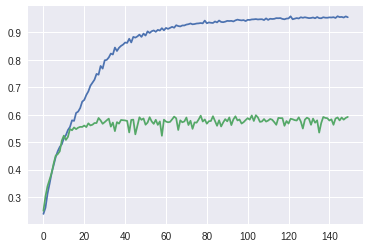

In [18]:
plt.plot(history.history["acc"],label="acc")
plt.plot(history.history["val_acc"],label="val_acc")

In [0]:
model.save("facial_expression_150_epoch.h5")